In [1]:
import kagglehub
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor

import kagglehub

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

C:\Users\pauli\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])

In [3]:
X = dataset[:, 1:2].astype(int) # 1 stulpelis, visos eilutės kaip X -features set'as↪
print(X)
y = dataset[:, 2].astype(int)
# print y - labels
print(y)

[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]
[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]


In [4]:
regressor = DecisionTreeRegressor(random_state = 0)

In [5]:
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [6]:
y_pred = regressor.predict([[3750]])
print("Predicted price: % d\n"% y_pred)

Predicted price:  8000



C:\Users\pauli\AppData\Local\Temp\ipykernel_6056\1662379063.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted price: % d\n"% y_pred)


C:\Users\pauli\AppData\Local\Temp\ipykernel_6056\4059612839.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


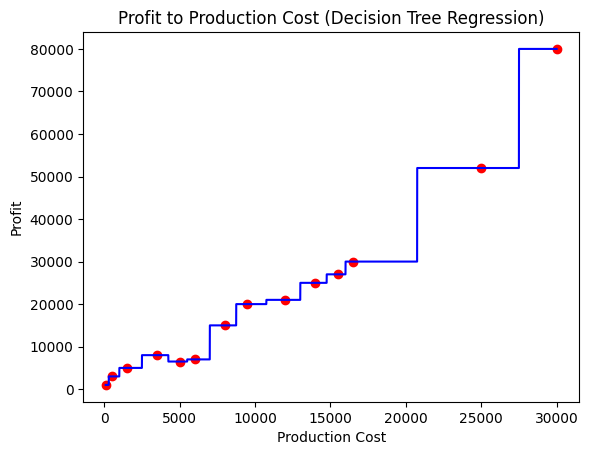

In [7]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
# specify title
plt.title('Profit to Production Cost (Decision Tree Regression)')
# specify X axis label
plt.xlabel('Production Cost')
# specify Y axis label
plt.ylabel('Profit')
# show the plot
plt.show() 

In [8]:
# import export_graphviz
from sklearn.tree import export_graphviz

In [9]:

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot', feature_names =['Production Cost'])

In [10]:
# Sprendžiama problema: Savaitgalio veiklos pasirinkimas
# Sprendimo taškai:
# • Orai: Ar bus saulėta, ar lietinga?
# • Energingumo lygis: Ar jaučiatės energingi, ar pavargę?
# • Kompanija: Ar draugai gali prisijungti?
# Sprendimų medžiui sukurti naudokite draw.io

In [11]:

path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\pauli\.cache\kagglehub\datasets\jainilcoder\online-payment-fraud-detection\versions\1


In [12]:
df = pd.read_csv(r"C:\Users\pauli\.cache\kagglehub\datasets\jainilcoder\online-payment-fraud-detection\versions\1\onlinefraud.csv")

In [13]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [15]:
df1=df
df1=df1.dropna()

In [16]:
df1['type'] = LabelEncoder().fit_transform(df1['type'])
type_kodas = dict(zip(df1['type'], df1['type']))

df1['nameOrig'] = LabelEncoder().fit_transform(df1['nameOrig'])
nameOrig_kodas = dict(zip(df1['nameOrig'], df1['nameOrig']))

df1['nameDest'] = LabelEncoder().fit_transform(df1['nameDest'])
nameDest_kodas = dict(zip(df1['nameDest'], df1['nameDest']))

In [17]:
print(type_kodas)

{3: 3, 4: 4, 1: 1, 2: 2, 0: 0}


In [18]:
X= df1.drop(columns=['isFraud'])

y=df1['isFraud']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

C:\Users\pauli\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression model accuracy (in %): 99.90983798078989


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=23)

# Initialize and train the logistic regression model with increased max_iter
clf = LogisticRegression(random_state=0, max_iter=500)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Logistic Regression model accuracy (in %):", acc * 100)

Logistic Regression model accuracy (in %): 99.91659620303166


In [21]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("DecisionTreeClassifier model accuracy (in %)", accuracy*100)

DecisionTreeClassifier model accuracy (in %) 99.96573738491377


<Axes: >

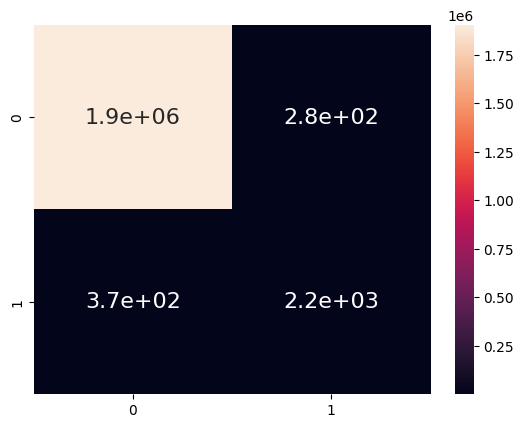

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})